In [1]:
%matplotlib inline
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import matplotlib.lines as mlines

filepath = os.path.join('resources', 'indicator_df.csv')
Indicator_df = pd.read_csv(filepath, header=0)

filepath = os.path.join('resources','HDI_df.csv')
HDI_df = pd.read_csv(filepath)

In [2]:
Indicator_df = Indicator_df.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'])
Indicator_df = Indicator_df.rename(columns={"variable": "Year"})
Indicator_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Year,value
0,Arab World,ARB,"Population, total",SP.POP.TOTL,1960,9.219775e+07
1,Caribbean small states,CSS,"Population, total",SP.POP.TOTL,1960,4.194710e+06
2,Central Europe and the Baltics,CEB,"Population, total",SP.POP.TOTL,1960,9.140176e+07
3,Early-demographic dividend,EAR,"Population, total",SP.POP.TOTL,1960,9.800853e+08
4,East Asia & Pacific,EAS,"Population, total",SP.POP.TOTL,1960,1.040958e+09


In [3]:
hdi_df = HDI_df.melt(id_vars=['Country'])
hdi_df.head()

,Country,variable,value
0,Afghanistan,1990,0.298
1,Albania,1990,0.644
2,Algeria,1990,0.578
3,Andorra,1990,..
4,Angola,1990,..


In [4]:
merged_df = pd.merge(Indicator_df, hdi_df, left_on = ['Country Name', 'Year'], right_on=['Country', 'variable'])

In [5]:
new_df = merged_df.drop(['Country', 'variable'], axis=1)
new_df = new_df.rename(columns={"value_x": "Value", "value_y": "HDI"})
new_df = new_df.dropna()
new_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Value,HDI
0,South Asia,SAS,"Population, total",SP.POP.TOTL,1990,1.133495e+09,0.441
1,South Asia,SAS,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1990,5.814480e+01,0.441
2,South Asia,SAS,GDP (current US$),NY.GDP.MKTP.CD,1990,4.072270e+11,0.441
4,South Asia,SAS,"Agriculture, forestry, and fishing, value adde...",NV.AGR.TOTL.ZS,1990,2.691710e+01,0.441
5,Sub-Saharan Africa,SSF,"Population, total",SP.POP.TOTL,1990,5.094519e+08,0.402


In [7]:
new_df.to_csv('resources/new_df.csv', header = True)

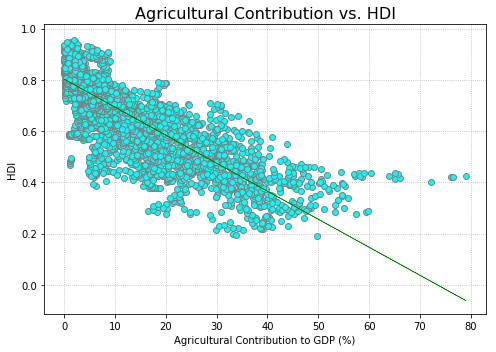

0.6693471279094266


In [15]:
Ag_df = new_df.loc[(new_df['Indicator Name']=='Agriculture, forestry, and fishing, value added (% of GDP)')]
Agri_df =  Ag_df.loc[(Ag_df['HDI']!='..')]
# defining variables
x = Agri_df['Value']
y = Agri_df['HDI'].astype('float')

# linear regression stats and fitline
slope, intercept, r_value, p_value, _ = stats.linregress(x,y)
fit = intercept + slope*(np.array(x))

# Scatter plot
fig, ax = plt.subplots(figsize = (7,5))
ax.scatter(x, y, color='aqua', edgecolor='grey', zorder=2)
plt.plot(x, fit, 'black', label='fitted line', linewidth=0.6, color='green')
plt.grid(linestyle='dotted', zorder=0)

plt.xlabel('Agricultural Contribution to GDP (%)')
plt.ylabel('HDI')
plt.title("Agricultural Contribution vs. HDI", fontsize=16)

# Show the figure
plt.tight_layout()
img_path = os.path.join('resources/images', 'Agriculture_HDI.png')
plt.savefig(img_path)
plt.show()

print(r_value**2)


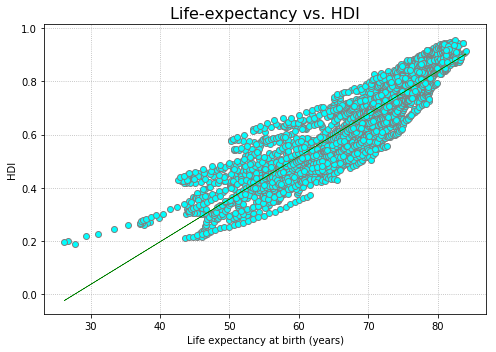

0.8358149986311461


In [16]:
Life_df = new_df.loc[(new_df['Indicator Name']=='Life expectancy at birth, total (years)')]
Life_values =  Life_df.loc[(Life_df['HDI']!='..')]
# defining variables
x = Life_values['Value']
y = Life_values['HDI'].astype('float')

# linear regression stats and fitline
slope, intercept, r_value, p_value, _ = stats.linregress(x,y)
fit = intercept + slope*(np.array(x))

# Scatter plot
fig, ax = plt.subplots(figsize = (7,5))
ax.scatter(x, y, color='aqua', edgecolor='grey', zorder=2)
plt.plot(x, fit, 'black', label='fitted line', linewidth=0.6, color='green')
plt.grid(linestyle='dotted', zorder=0)

plt.xlabel('Life expectancy at birth (years)')
plt.ylabel('HDI')
plt.title("Life-expectancy vs. HDI", fontsize=16)

# Show the figure
plt.tight_layout()
img_path = os.path.join('resources/images', 'Life-expectancy_HDI.png')
plt.savefig(img_path)
plt.show()

print(r_value**2)

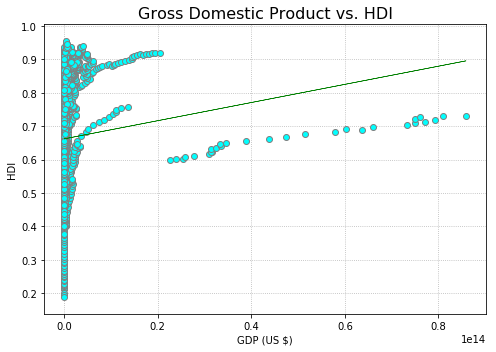

0.005641587697516796


In [17]:
GDP_df = new_df.loc[(new_df['Indicator Name']=='GDP (current US$)')]
GDP_values =  GDP_df.loc[(GDP_df['HDI']!='..')]
# defining variables
x = GDP_values['Value']
y = GDP_values['HDI'].astype('float')

# linear regression stats and fitline
slope, intercept, r_value, p_value, _ = stats.linregress(x,y)
fit = intercept + slope*(np.array(x))

# Scatter plot
fig, ax = plt.subplots(figsize = (7,5))
ax.scatter(x, y, color='aqua', edgecolor='grey', zorder=2)
plt.plot(x, fit, 'black', label='fitted line', linewidth=0.6, color='green')
plt.grid(linestyle='dotted', zorder=0)

plt.xlabel('GDP (US $)')
plt.ylabel('HDI')
plt.title("Gross Domestic Product vs. HDI", fontsize=16)

# Show the figure
plt.tight_layout()
img_path = os.path.join('resources/images', 'GDP_HDI.png')
plt.savefig(img_path)
plt.show()

print(r_value**2)

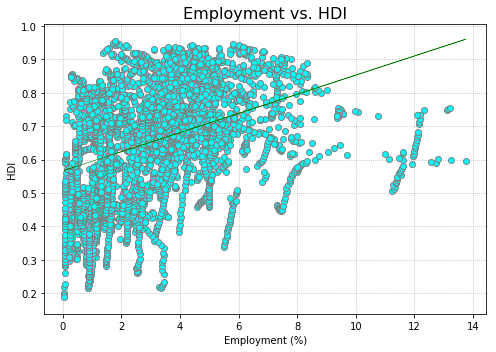

0.14370014905305584


In [18]:
employment_df = new_df.loc[(new_df['Indicator Name']=='Employers, total (% of total employment) (modeled ILO estimate)')]
employment_values =  employment_df.loc[(employment_df['HDI']!='..')]
# defining variables
x = employment_values['Value']
y = employment_values['HDI'].astype('float')

# linear regression stats and fitline
slope, intercept, r_value, p_value, _ = stats.linregress(x,y)
fit = intercept + slope*(np.array(x))

# Scatter plot
fig, ax = plt.subplots(figsize = (7,5))
ax.scatter(x, y, color='aqua', edgecolor='grey', zorder=2)
plt.plot(x, fit, 'black', label='fitted line', linewidth=0.6, color='green')
plt.grid(linestyle='dotted', zorder=0)

plt.xlabel('Employment (%)')
plt.ylabel('HDI')
plt.title("Employment vs. HDI", fontsize=16)

# Show the figure
plt.tight_layout()
img_path = os.path.join('resources/images', 'Employment_HDI.png')
plt.savefig(img_path)
plt.show()

print(r_value**2)